<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Евгения! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела.





</div>

## Откройте и изучите файл

Импортируем все необходимые библиотеки

In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn import tree

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 


<div class="alert alert-warning">

Совет:     
    
    


- кстати есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html), в будущем пригодится )  



<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>
<div class="alert alert-info">
    
Прочитала, добавила разделение на группы в импорты

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:

    
    
Отлично    
    
    
Смотри что ещё можно сделать Согласно PEP-8.  Допустим у тебя
    

    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import GridSearchCV
    

Пишем в одну строку через запятую    

    
    from sklearn.model_selection import cross_val_score,  train_test_split, ...
    
    
Во-вторых Допустим у тебя
    
    
    # pip install nltk # доустанавливаем необходимые библиотеки
    # pip install pywsd
    # pip install transformers  
    
    
    
Это значит что у нас сторонние библиотеки и значит    

    
    
    import transformers
    
итд
    
ставим в самый конец    
    

    
Вот такие советы на будущее    

Откроем файл

In [2]:
try:
    df = pd.read_csv('/datasets/users_behavior.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')
df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


Изучим инфо

In [3]:
df.shape

(3214, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Изменим тип на цельночисленный

In [5]:
df['minutes'] = df['minutes'].astype('int')
df['calls'] = df['calls'].astype('int')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   int64  
 1   minutes   3214 non-null   int64  
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 125.7 KB


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 Данные изучены.



<div class="alert alert-warning">



Совет: 


- Можно еще отдельно проверить датасет на сбалансированность классов в таргете. Это помогло бы решить бонусное задание сразу (Только не надо балансировать данные, это тема следующего проекта).




- Можно посмотреть корреляцию признаков. Знаешь что такое мультиколлинеарность, какие два типа проблем возникает, для каких моделей и какие варианты решения?




</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>
<div class="alert alert-info">
    
Корреляция - done
<div>
Cбалансированность классов в разделе ниже - done

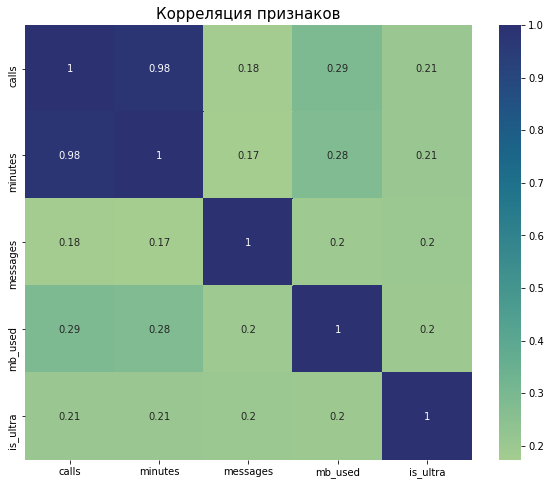

In [7]:
plt.figure(figsize = (10, 8));
plt.title('Корреляция признаков', fontsize = 15)
sns.heatmap(df.corr(), annot = True, cmap="crest");

Видим сильную корреляцию между двумя признаками `calls` и `minutes`. В этом случае модель может давать хорошие результаты на обучающей выборке, но плохо работать с новым набором данных. При построении линейных моделей мультиколлинеарность может вызвать 2 типа проблем:
    
    -Оценки коэффициентов модели могут сильно колебаться в зависимости от других признаков.
    -Точность оценок коэффициентов снижается. Это затрудняет определение того, какие признаки на самом деле являются статистически значимыми.

Варианты решений:
    
    -можно удалить один из сильно коррелируемых признаков
    -объеденить два признака в один (создать новый столбец)
    -использовать методы специально разработанные для работы с сильно коррелированными переменными (метод наименьших квадратов, например).



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>


Совет 🤔:



Верно. Добавлю немножко дополнительно
    


- Первый момент: мультиколлинеарность проблема линейных моделей - могут переобучаться.... теоретически. Но в логистической, и в линейной регрессиях реализована регуляризация, которая решает проблему мультиколлинеарности признаков. "Деревянные" модели (RF, DT) устойчивы к мультиколлинеарности, а кластеризация тоже почти не зависит от линейных зависимостей. Получается, избавляться от мультиколлинеарности чтобы не переобучаться не обязательно )) 
    
    
- Второй момент: интерпретируемость линейной модели (мы по коеффициентам судим как признаки влияют на таргет), тут  мультиколлинеарность надо убирать.


Так что получается что в нашем случае убирать мультиколлинеарность имеет смысл только если мы захотим посмотреть как конкретно признаки влияют на Таргет


## Разбейте данные на выборки

Извлечем целевой признак

In [8]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

Разделим данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1

In [9]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, random_state=12345, stratify=target)

In [10]:
print('Размер обучающей выборки:', features_train.shape)

Размер обучающей выборки: (1928, 4)


In [11]:
features_valid, features_test, target_valid, target_test = train_test_split(features_test, target_test, test_size=0.5, random_state=12345, stratify=target_test)

In [12]:
print('Размер валидационной выборки:', features_valid.shape)
print('Размер тестовой выборки:', features_test.shape)

Размер валидационной выборки: (643, 4)
Размер тестовой выборки: (643, 4)


Посмотрим на сбалансированность классов

In [13]:
df['is_ultra'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    69.4%
1    30.6%
Name: is_ultra, dtype: object

In [14]:
target_train.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    69.3%
1    30.7%
Name: is_ultra, dtype: object

In [15]:
target_test.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    69.4%
1    30.6%
Name: is_ultra, dtype: object

In [16]:
target_valid.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    69.4%
1    30.6%
Name: is_ultra, dtype: object

Классы в таргете сбалансированны во всех выборках

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Все правильно!

Здорово что проконтролировано разбиение (можно с помощью .shape,  можно .len)


<div class="alert alert-warning">



Совет: 


- Обрати внимание на аргумент stratify, он позволит сохранить изначальное распределение таргетов во всех новых датасетах.  Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым. [Почитать](https://pythonru.com/baza-znanij/sklearn-train-test-split) можно тут



<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>
<div class="alert alert-info">
    
Использовала аргумент stratify. 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍




</div>


## Исследуйте модели

Напишем функцию для рассчитывания accuracy

In [17]:
def accuracy(model):
    predictions_valid = model.predict(features_valid)
    return accuracy_score(target_valid, predictions_valid)

Дерево решений

In [18]:
%%time
best_model_dt = None
best_result = 0
depth_dt = []
accuracy_train_dt = []
accuracy_valid_dt = []
for depth in range(1, 21):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dt.fit(features_train, target_train)
    result_train = model_dt.score(features_train, target_train)
    result_valid = model_dt.score(features_valid, target_valid)
    depth_dt.append(depth) 
    accuracy_train_dt.append(result_train) 
    accuracy_valid_dt.append(result_valid)
    print('depth =', depth, '|',  'accuracy =', accuracy(model_dt))
    if result_valid > best_result:
        best_model_dt = model_dt 
        best_result = result_valid
    elif depth == 2:
        model_two = model_dt
print("Accuracy наилучшей модели на валидационной выборке:", best_result, best_model_dt)

depth = 1 | accuracy = 0.7402799377916018
depth = 2 | accuracy = 0.7729393468118196
depth = 3 | accuracy = 0.7776049766718507
depth = 4 | accuracy = 0.7542768273716952
depth = 5 | accuracy = 0.7853810264385692
depth = 6 | accuracy = 0.7744945567651633
depth = 7 | accuracy = 0.7869362363919129
depth = 8 | accuracy = 0.80248833592535
depth = 9 | accuracy = 0.7776049766718507
depth = 10 | accuracy = 0.776049766718507
depth = 11 | accuracy = 0.7651632970451011
depth = 12 | accuracy = 0.7589424572317263
depth = 13 | accuracy = 0.7542768273716952
depth = 14 | accuracy = 0.7620528771384136
depth = 15 | accuracy = 0.7636080870917574
depth = 16 | accuracy = 0.7573872472783826
depth = 17 | accuracy = 0.7402799377916018
depth = 18 | accuracy = 0.7309486780715396
depth = 19 | accuracy = 0.7340590979782271
depth = 20 | accuracy = 0.7216174183514774
Accuracy наилучшей модели на валидационной выборке: 0.80248833592535 DecisionTreeClassifier(max_depth=8, random_state=12345)
CPU times: user 206 ms, sys

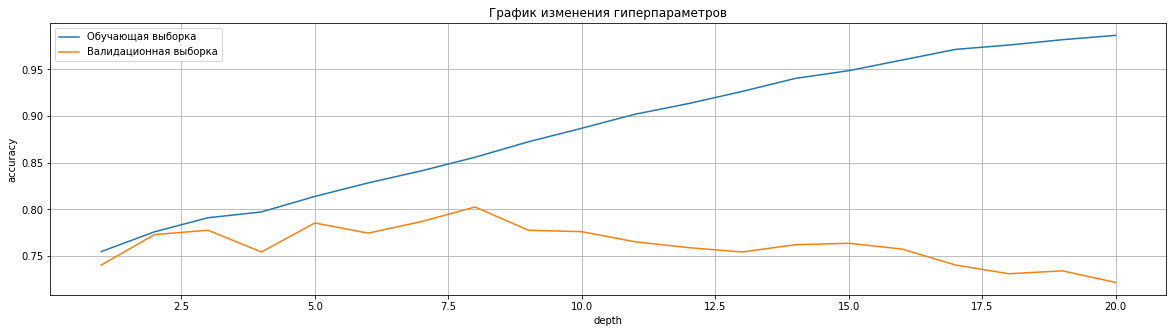

In [19]:
plt.figure(figsize=(20, 5))
plt.grid(True)
plt.plot(depth_dt, accuracy_train_dt)
plt.plot(depth_dt, accuracy_valid_dt)
plt.legend(['Обучающая выборка', 'Валидационная выборка'])
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('График изменения гиперпараметров')
plt.show()

In [20]:
# tree.plot_tree(best_model)
# plt.show()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:
 
Работа выполнена в соответствии с критериями: 



 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле




<div class="alert alert-warning">


Совет: 




- Ты тут и ниже лучшую модель записываешь под тем же названием  - best_model, поэтому в следующем цикле она перезапишется Не лучше ли использовать    разные названия допустим best_model_dt и best_model_rf, иначе зачем они вообще нужны? 



- Можно добавить график, хорошо оформленный график украсит проект. Тут на графике можно посмотреть как при изменении гиперпараметров меняется точность на train и validation датасете (для этого собираем наши метрики на валидации и train в списки, а затем по ним обычный plt.plot()) Такой способ используют чтобы лучше отследить переобучение, но для этого стоит взять пернебор по max_depth поглубже



- tree_plot можно построить, с max_depth равной 3 или 4 (глубже уже будет громоздко) - глянуть как DT сплиты делает, будет понимание как модель принимает решения: какие признаки  использует, на каких значениях делает разбиение вправо - влево 




</div>



<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>
<div class="alert alert-info">

На графике видно, что переобучение наступает после depth = 2. Значит ли это, что нужно выбирать модель не с лучшей Accuracy, а с метрикой хуже?

То есть max_depth=8 и Accuracy 0.80248833592535 - это переобученная модель?

Надо выбрать модель с max_depth=2 и Accuracy 0.7729393468118196?
    
Не поняла как tree_plot можно построить, с max_depth равной 3 или 4 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

tree_plot - теперь заказчику можно обьяснить как примерно модель принимает решение, один из плюсов DT.

    
График по метрикам Отлично оформлен. 




<div class="alert alert-warning">


Совет:

- tree_plot

    
Так красивей и понятней (схема)
    
    from sklearn import tree
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(35,20))
    _ = tree.plot_tree(best_model_tree, 
                   feature_names=features.columns.values, 
                   class_names=['Smart','Ultra'],
                   filled=True,
                   fontsize = 15,
                   max_depth = 3     # Это чтобы прорисовывало 3 уровня, не глубже
                      )
    
   
    
- Переобучение начинается после 8 - как видишь после 8 Метрика на валидации начинает только падать, то есть модель с глубиной больше 8 уже не обобщает, а просто запоминает данные    

Случайный лес

In [21]:
best_model_rf = None
best_result = 0
best_est = 0
best_depth = 0
for est in tqdm(range(1,11)):
    for depth in range(1, 11):
        model_rf = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model_rf.fit(features_train, target_train)
        result = model_rf.score(features_valid, target_valid)
        print('n_estimators =', est, '|','max_depth =',  depth, '|', 'accuracy_score =', accuracy(model_rf))
        if result > best_result:
            best_model_rf = model_rf 
            best_result = result
            best_est = est
            best_depth = depth


 20%|██        | 2/10 [00:00<00:00, 10.11it/s]

n_estimators = 1 | max_depth = 1 | accuracy_score = 0.7480559875583204
n_estimators = 1 | max_depth = 2 | accuracy_score = 0.776049766718507
n_estimators = 1 | max_depth = 3 | accuracy_score = 0.776049766718507
n_estimators = 1 | max_depth = 4 | accuracy_score = 0.7558320373250389
n_estimators = 1 | max_depth = 5 | accuracy_score = 0.7713841368584758
n_estimators = 1 | max_depth = 6 | accuracy_score = 0.7791601866251944
n_estimators = 1 | max_depth = 7 | accuracy_score = 0.7791601866251944
n_estimators = 1 | max_depth = 8 | accuracy_score = 0.7884914463452566
n_estimators = 1 | max_depth = 9 | accuracy_score = 0.7682737169517885
n_estimators = 1 | max_depth = 10 | accuracy_score = 0.7791601866251944
n_estimators = 2 | max_depth = 1 | accuracy_score = 0.7153965785381027
n_estimators = 2 | max_depth = 2 | accuracy_score = 0.7573872472783826
n_estimators = 2 | max_depth = 3 | accuracy_score = 0.7900466562986003
n_estimators = 2 | max_depth = 4 | accuracy_score = 0.7729393468118196
n_estim

 40%|████      | 4/10 [00:00<00:00,  8.09it/s]

n_estimators = 4 | max_depth = 7 | accuracy_score = 0.7993779160186625
n_estimators = 4 | max_depth = 8 | accuracy_score = 0.7838258164852255
n_estimators = 4 | max_depth = 9 | accuracy_score = 0.7947122861586314
n_estimators = 4 | max_depth = 10 | accuracy_score = 0.7667185069984448
n_estimators = 5 | max_depth = 1 | accuracy_score = 0.7651632970451011
n_estimators = 5 | max_depth = 2 | accuracy_score = 0.7698289269051322
n_estimators = 5 | max_depth = 3 | accuracy_score = 0.7916018662519441
n_estimators = 5 | max_depth = 4 | accuracy_score = 0.7916018662519441
n_estimators = 5 | max_depth = 5 | accuracy_score = 0.7853810264385692
n_estimators = 5 | max_depth = 6 | accuracy_score = 0.7916018662519441
n_estimators = 5 | max_depth = 7 | accuracy_score = 0.7947122861586314
n_estimators = 5 | max_depth = 8 | accuracy_score = 0.7838258164852255
n_estimators = 5 | max_depth = 9 | accuracy_score = 0.7916018662519441


 50%|█████     | 5/10 [00:00<00:00,  7.29it/s]

n_estimators = 5 | max_depth = 10 | accuracy_score = 0.8009331259720062
n_estimators = 6 | max_depth = 1 | accuracy_score = 0.749611197511664
n_estimators = 6 | max_depth = 2 | accuracy_score = 0.7682737169517885
n_estimators = 6 | max_depth = 3 | accuracy_score = 0.7931570762052877
n_estimators = 6 | max_depth = 4 | accuracy_score = 0.7869362363919129
n_estimators = 6 | max_depth = 5 | accuracy_score = 0.7822706065318819
n_estimators = 6 | max_depth = 6 | accuracy_score = 0.7962674961119751
n_estimators = 6 | max_depth = 7 | accuracy_score = 0.7916018662519441
n_estimators = 6 | max_depth = 8 | accuracy_score = 0.7838258164852255
n_estimators = 6 | max_depth = 9 | accuracy_score = 0.7853810264385692


 60%|██████    | 6/10 [00:00<00:00,  6.37it/s]

n_estimators = 6 | max_depth = 10 | accuracy_score = 0.7962674961119751
n_estimators = 7 | max_depth = 1 | accuracy_score = 0.7651632970451011
n_estimators = 7 | max_depth = 2 | accuracy_score = 0.7776049766718507
n_estimators = 7 | max_depth = 3 | accuracy_score = 0.7962674961119751
n_estimators = 7 | max_depth = 4 | accuracy_score = 0.7900466562986003
n_estimators = 7 | max_depth = 5 | accuracy_score = 0.7869362363919129
n_estimators = 7 | max_depth = 6 | accuracy_score = 0.7947122861586314
n_estimators = 7 | max_depth = 7 | accuracy_score = 0.7978227060653188
n_estimators = 7 | max_depth = 8 | accuracy_score = 0.7900466562986003


 70%|███████   | 7/10 [00:01<00:00,  5.45it/s]

n_estimators = 7 | max_depth = 9 | accuracy_score = 0.80248833592535
n_estimators = 7 | max_depth = 10 | accuracy_score = 0.7993779160186625
n_estimators = 8 | max_depth = 1 | accuracy_score = 0.7620528771384136
n_estimators = 8 | max_depth = 2 | accuracy_score = 0.7729393468118196
n_estimators = 8 | max_depth = 3 | accuracy_score = 0.7931570762052877
n_estimators = 8 | max_depth = 4 | accuracy_score = 0.7869362363919129
n_estimators = 8 | max_depth = 5 | accuracy_score = 0.7962674961119751
n_estimators = 8 | max_depth = 6 | accuracy_score = 0.7962674961119751
n_estimators = 8 | max_depth = 7 | accuracy_score = 0.8040435458786936


 80%|████████  | 8/10 [00:01<00:00,  4.87it/s]

n_estimators = 8 | max_depth = 8 | accuracy_score = 0.7962674961119751
n_estimators = 8 | max_depth = 9 | accuracy_score = 0.807153965785381
n_estimators = 8 | max_depth = 10 | accuracy_score = 0.7978227060653188
n_estimators = 9 | max_depth = 1 | accuracy_score = 0.7511664074650077
n_estimators = 9 | max_depth = 2 | accuracy_score = 0.7776049766718507
n_estimators = 9 | max_depth = 3 | accuracy_score = 0.7947122861586314
n_estimators = 9 | max_depth = 4 | accuracy_score = 0.7931570762052877
n_estimators = 9 | max_depth = 5 | accuracy_score = 0.7947122861586314
n_estimators = 9 | max_depth = 6 | accuracy_score = 0.7962674961119751


 90%|█████████ | 9/10 [00:01<00:00,  4.46it/s]

n_estimators = 9 | max_depth = 7 | accuracy_score = 0.7962674961119751
n_estimators = 9 | max_depth = 8 | accuracy_score = 0.7947122861586314
n_estimators = 9 | max_depth = 9 | accuracy_score = 0.8055987558320373
n_estimators = 9 | max_depth = 10 | accuracy_score = 0.7962674961119751
n_estimators = 10 | max_depth = 1 | accuracy_score = 0.7542768273716952
n_estimators = 10 | max_depth = 2 | accuracy_score = 0.7744945567651633
n_estimators = 10 | max_depth = 3 | accuracy_score = 0.7947122861586314
n_estimators = 10 | max_depth = 4 | accuracy_score = 0.7947122861586314
n_estimators = 10 | max_depth = 5 | accuracy_score = 0.7900466562986003
n_estimators = 10 | max_depth = 6 | accuracy_score = 0.7993779160186625
n_estimators = 10 | max_depth = 7 | accuracy_score = 0.8009331259720062
n_estimators = 10 | max_depth = 8 | accuracy_score = 0.8009331259720062


100%|██████████| 10/10 [00:01<00:00,  5.01it/s]

n_estimators = 10 | max_depth = 9 | accuracy_score = 0.8087091757387247
n_estimators = 10 | max_depth = 10 | accuracy_score = 0.8009331259720062


In [22]:
print("Accuracy наилучшей модели на валидационной выборке:", best_result, best_model_rf)

Accuracy наилучшей модели на валидационной выборке: 0.8087091757387247 RandomForestClassifier(max_depth=9, n_estimators=10, random_state=12345)




<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:
    
По большему числу гиперпараметров перебор -   тем лучше метрика. Случайный лес мощная модель и по ней действительно стоит поперебирать несколько гиперпораметров. Здорово   




<div class="alert alert-warning">


Совет: 




- Когда что то долго крутиться, можно использовать  %%time - ставишь на самый вверх ячейки с кодом, время выполнения которого хочешь замерить, может не знаешь.  Быстрее не станет, но все будут видеть стоит ли ждать не отходя от ПК или можно сходить чаек поставить )) 
    
    Или tqdm, это ещё лучше, потому что он показывает интерактивно, на каком этапе расчетов мы находимся

    
    from tqdm import tqdm


    for n_estimators in tqdm(range(3,58)):

        ..........



(дальше мы будем уходить от неэффективных в питоне циклов к apply.  Там тоже есть аналог прогресс-баров:  .progress_apply)
    
И будет красиво )   
 


Логистическая регрессия

In [23]:
sol = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [24]:
best_model_lr = None
best_result = 0
for s in sol:
    model_lr = LogisticRegression(solver=s, random_state=12345)
    model_lr.fit(features_train, target_train)
    result = model_lr.score(features_valid, target_valid)
    accuracy(model_lr)
    if result > best_result:
        best_model_lr = model_lr 
        best_result = result
print("Accuracy наилучшей модели на валидационной выборке:", best_result, best_model_lr)


Accuracy наилучшей модели на валидационной выборке: 0.7387247278382582 LogisticRegression(random_state=12345, solver='newton-cg')


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Ошибка ❌:





- Кстати вот тут ошибка, нет подсчёта метрики на валидации
    
    


<div class="alert alert-info">
<font size="5"><b>Комментарий студента V2</b></font>
<div class="alert alert-info">

Тут нет ошибки, функция считает же accuracy(model_lr)



    def accuracy(model):
    
        predictions_valid = model.predict(features_valid)
    
        return accuracy_score(target_valid, predictions_valid)



<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Ошибка ❌:



У тебя нет result, чтобы потом срабатывало условие
    
    
    result > best_result
    
    
В итоге Ты выводишь метрику другой модели    
    

<div class="alert alert-info">
<font size="5"><b>Комментарий студента V3</b></font>
<div class="alert alert-info">

Упс. Исправила
    
Спасибо!

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV4</b></font>



Успех 👍:



И как видишь у Логистической регрессии очень скромная Метрика




</div>


*Дерево решений*

Accuracy наилучшей модели на валидационной выборке: 0.80248833592535 DecisionTreeClassifier(max_depth=8, random_state=12345)


*Случайный лес*

Accuracy наилучшей модели на валидационной выборке: 0.8087091757387247 RandomForestClassifier(max_depth=9, n_estimators=10, random_state=12345)


*Логистическая регрессия*

Accuracy наилучшей модели на валидационной выборке: 0.7387247278382582 LogisticRegression(random_state=12345, solver='newton-cg')


Лучшая модель - случайный лес с параметрами:

    -max_depth=9
    -n_estimators=10
    -random_state=12345


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Все верно, RF лучший. 


<div class="alert alert-warning">


Совет: 

Если есть желание можешь ответить на вопросики ))    



- Как назвать ситуацию, когда на валидации при увеличении глубины дерева (модель DT), метрика качества стала снижаться? Как по твоему в это же время вела себя эта же метрика на train?


- Насколько знаю вы еще под капот моделям не заглядывали, но может знаешь почему обычно RF показывает более высокие результаты из выбранных?


- Мы решаем задачу классификации (а еще есть задача регрессии), а в названии модели с помощью которой мы решаем задачу "классификации" (Логистическая регрессия) есть слово "регрессия".  Нет ли тут парадокса? )
    

- Почему логистическая регрессия показывать на много более худшие результаты?  


</div>





<div class="alert alert-info"><span style="font-size: x-large;"><strong>Комментарий студента</strong></span>
<div class="alert alert-info">Ответики</div>
<ul>
<li class="alert alert-info">при увеличении глубины дерева метрика качества на обучающей выборке растет, а на валидационной снижается - переобучение?</li>
<li class="alert alert-info">RF показывает более высокие результаты, возможно, потому что разбивает на более мелкие группы?</li>
<li class="alert alert-info">Наверное, логистическая регрессия - это линейная модель, предсказывающая непрерывное значение от 0 до 1, но регрессирующая до двух классов 0 и 1, то есть "превращается" из линейной в модель классификации. Если значение меньше 0,5, то ответ 0, если больше 0,5, то ответ 1.</li>
<li class="alert alert-info">Наверное, логистическая регрессия показывает намного более худшие результаты из за того, что случайный лес четко делит данные, например, количество минут больше 90 или меньше 90. Если больше 90, то переходим к следующему вопросу, а логистическая регрессия рассчитывает вероятность того, что количество минут больше 90 или меньше 90. То есть случайный лес четко разделяет на 1 и 0, а регрессия дает процент от 0 до 100 (от 0 до 1. например 0,3 или 0,7 )</li>
</ul>
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>


Успех:


Дополню чуть

1. Верно, переобучение. На train точность растет вплоть до 100%. На твоём графике это всё отлично видно
    
    
2. В RF обучается несколько деревьев, а решение принимается путем голосования. Каждое дерево в RF учится на своем датасете (используется техника бутстрап), таким образом достигается "независимость" этих самых деревьев, в итоге ошибка разброса снижается.

    
3. "Регрессия", потому что внутри нее скалярное произведение (как и в линейной регрессии), дающее на выходе вещественное число (от + бесконечности до - бесконечности), на это число вешают сигмойду, логарифм и получают значение от 0 до 1 (вероятность класса).   
    
    
4. Логистическая регрессия плоха (и хороша с другой стороны) тем что это линейный классификатор: обьекты на классы разделяем гиперплоскостью (прямой если на плоскости), а в данном датасете видимо более сложные, нелинейные связи между признаками и таргетом.   А RF с DT с этим справляются. На других данных  LR могла оказаться лучше, например потому что RF не может экстраполировать. 


</div>

## Проверьте модель на тестовой выборке

In [ ]:
best_model_rf.fit(features_train, target_train)
predictions_test = best_model_rf.predict(features_test)
accuracy_score(target_test, predictions_test)

На тестовой выборке accuracy близок к валидационной. Модель не переобучилась и недообучилась. Хорошая модель.


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


- Все верно, логика моделирования не нарушена, тут тестируем только лучшую модель (или парочку, если метрики были близки) отобранную на валидации. 

- Если студент получил на тесте accuraсy  выше 0,78, это считается отличным результатом. Ты подбираешь лучшую комбинацию не по одному гиперпараметру и вот он результат!


<div class="alert alert-warning">

Вопросики и совет:




- Как попробовать улучшить результат, не мучаясь с кодом?! Смотри - мы сформировали train выборку на которой обучаем модель, а валидационную используем для поиска лучших значений гиперпараметров. Оке, нашли их. Так почему бы теперь модель с выбранными гиперпараметрами не обучить на тренировочной + валидационной выборке (только не нужно делать новые сплиты, используй pd.concat(), к примеру)?! Чем больше данных, тем лучше модель может обучиться. И эту дообученную модель проверим на тесте. Гаранитий что станет лучше нет, но ML это постоянные эксперименты.  
    
    
- А можешь предложить как нам использовать полученный результат в бизнесе? Как нам на этих прогнозах сделать деньги? 


</div>

<div class="alert alert-info"><span style="font-size: x-large;"><strong>Комментарий студента</strong></span>
<ul>
<li class="alert alert-info">О_о вообще не поняла. А что и как объединять? А разве у меня модели не обучены на тренировочной + валидационной выборке с лучшими гипрепараметрами? Я же перебором выбрала лучшие гиперпараметры и обучила на них модель.</li>
<li class="alert alert-info">Предлагать клиентам с похожими тратами минут, сообщений и мегабайтов перейти на тариф ультра либо смарт с архивных тарифов.</li>
</ul>
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



    О_о вообще не поняла. А что и как объединять? А разве у меня модели не обучены на тренировочной + валидационной выборке с лучшими гипрепараметрами? Я же перебором выбрала лучшие гиперпараметры и обучила на них модель.

    
    
    Обучал Ты только на features_train. Валидационная нужна только для подбора гиперпараметров. Мы их нашли.  А теперь Почему бы не обучить эту модель с найденными лучшими гиперпараметрами на большем датасете, вы чем на большем dataset мы обучим, тем больше мы даём шанса модели найти закономерность?! Логика такая.  В общем я по сути написал то что уже писал выше.  Понятнее логику не объясню. Кстати благодаря тому что ты написал нашёл у тебя ошибку которую пропустил на первый итерации

    
    
    
    
- Довольный клиент это к деньгам ) Я вижу практическое применение прогнозов модели еще и таким образом. Допустим какой-то тариф более выгоден компании, тогда мы можем предложить перейти на него клиентам, но не всем, а тем, кому данный тариф подходит (на основе прогноза модели). Таким образом мы сэкономим время и деньги, ведь просто предлагать переходить всем это лишние траты (не говоря о клиентах, которые уходят, если слишком назойливо им что-то предлагать, что для них явно не подходит). 
    

## (бонус) Проверьте модели на адекватность

Вообще не поняла как это сделать



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет:


Смысл проверки на адекватность в нашем проекте, это сравнение прогноза нашей лучшей модели, с прогнозом наивной модели

Евгений, бонусное на то и бонусное, но можешь попробовать его решить с моей подсказкой.    

Ключевое это помнить  что у нас дисбаланс в таргете (нулей гораздно больше чем единиц) и четко понимать как считается accuracy.
В чем смысл проверки модели на адекватность  при дисбалансе? Вот смотри - обучили мы какую то модель, которая на test показывает 90% accuraсy. Шикарная модель скажем мы. А если в датасете у нас в метках таргета единичек 99,9% (допустим тренируем на данных где 1 это "кирпич упал на голову человеку когда он вышел из дома"), а нулей 0,1% ("не упал")?! Все также утверждаем что наша модель шикарная?! Нет, потому что всегда можно предсказывать что не упадает (единички) и accuracy будет равна 99,9%

Вот и тут мы сравниваем нашу обученную модель с примитивным прогнозом самого частого таргета. Какой у нас самый частый класс? Нули. Так посмотри accuracy_score target_test и ряда из одних нулей. Сколько будет?. 


    
    

При проверке на адекватность модели, рекомендую ознакомиться с [Dummy Models](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html), это удобная обертка для константных моделей и сделает тоже самое что я описал на словах

</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Совет:


Тут логика такая - у нас есть данные и мы видим что доля нулей в таргете около 69%, это значит что мы не проводя никакого анализа, моделирования итп итд, можем постоянно предсказывать 0 и получить точность около 69%. Вот эту accuracy в 69% мы и должны побить, иначе окажется что наша модель не лучше наивного прогноза самого частого класса.
      
    
С   DummyClassifier это выглядит  так:
    
    DummyClassifier(strategy='most_frequent', random_state=1)  
задаем константную модель, которая будет предсказывать по most_frequent - самый частый класс
    
    .fit(features_train, target_train)
тут модель смотри на самый частый класс в  target_train - типо "обучение"
    
    .predict(features_test)
    .score(features_test, target_test)
проогнозирует везде самый частый класс в features_test и считает score
    
Получаем тот же результат: acc около 69%.    



Сравниваем с accuracy нашей модели и делаем вывод



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>




Евгения, у тебя старательно выполненная работа, все четко, осмысленно. Вижу у тебя получается в ML,  дальше будет интересней )  



Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить): 




- обрати внимание на проверку сбалансированность классов в таргете в разделе EDA
- использовать stratify
- добавить график метрики    
- как можно улучшить результаты 



    
    
Замечания на будущее:
    

- Комментарии к коду отсутствуют - коллеги могут не понять хода твоих мыслей, пока вроде код простой, но стоит держать в голове что дальше код усложнится.  
- Было бы замечательно, в выводе немножко о данных, работе с ними (пусть даже никакой работы и не было), моделировании и полученных результатах. Это важно потому что когда проект захочет посмотреть будущий работодатель (или начальник), у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, а из общего вывода захочет получить представление о всей работе.

 
    
    
    

Посылаю на вторую итерацию, чтобы посмотреть твое решение бонусного задания (если захочешь доделать) и ответить на вопросы если они появятся





</div>

<div class="alert alert-info"><span style="font-size: x-large;"><strong>Комментарий студента</strong></span>
<div class="alert alert-info"><span style="font-size: x-large;"><strong>Вывод</strong></span>
<div class="alert alert-info">Оператор мобильной связи &laquo;Мегалайн&raquo; выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: &laquo;Смарт&raquo; или &laquo;Ультра&raquo;. В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Необходимо построить модель для задачи классификации, которая выберет подходящий тариф. 
    
<p>Данные полные, без пропусков и дубликатов<p>
    
<p>В ходе работы были построены 3 модели машинного обучения:<p>
<ul>Дерево решений</ul>
<ul>Случайный лес</ul>
<ul>Логистическая регрессия</ul>
<p>В ходе подбора гиперпараметров победила модель Случайного леса.</p>
<p>Accuracy &nbsp;0.8087091757387247</p>
<p>На тестовой выборке accuracy близок к валидационной (0.8009331259720062).&nbsp;</p>
<p>Модель можно применять в продакшене.</p>
</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    



Что осталось из красного:

 

    
- нет подсчёта метрики на валидации когда  подбирал гиперпараметры у логистической регрессии   


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Спасибо за работу!    

    
Та же ошибка    


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV4</b></font>

Спасибо за работу!    

    
Красное исправлено, многие желтые советы использованы, на  вопросы есть ответы  (это все было по желанию), значит стремишься развиваться, а желание и интерес это главное. Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.

    
    
Отличная работа Евгения. Желаю успехов в дальнейшей учебе!


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
